# Car Data Practical Example

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Load Data

In [6]:
raw_data = pd.read_csv('1.04. Real-life example.csv');
raw_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

## Preprocess

In [9]:
raw_data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [129]:
# data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         4345   4173.00   4345  4345.00  4195.00        4345   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           936       nan   1649      nan      nan        2019   
mean           NaN  19418.75    NaN   161.24     2.79         NaN   
std            NaN  25584.24    NaN   105.71     5.07         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6999.00    NaN    86.00     1.80         NaN   
50%            NaN  11500.00    NaN   155.00     2.20         NaN   
75%            NaN  21700.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year  
count          4345 4345.00  
unique            2     nan  
top             yes     nan  
freq           3947     nan  
mean            NaN 2006.55  
std             NaN    6.72  
min             NaN 1969.00  
25%             NaN 2003.00  
50%             NaN 2008.00  
75%             NaN 2012.00  
max             NaN 2016.00

## Check missing values

In [130]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Rule of thumb if you are removing <5% of the observations you are free to just remove all the have MV

In [131]:
data_no_mv = data.dropna(axis=0)

In [132]:
data_no_mv.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         4025   4025.00   4025  4025.00  4025.00        4025   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           880       nan   1534      nan      nan        1861   
mean           NaN  19552.31    NaN   163.57     2.76         NaN   
std            NaN  25815.73    NaN   103.39     4.94         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6999.00    NaN    90.00     1.80         NaN   
50%            NaN  11500.00    NaN   158.00     2.20         NaN   
75%            NaN  21900.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year  
count          4025 4025.00  
unique            2     nan  
top             yes     nan  
freq           3654     nan  
mean            NaN 2006.38  
std             NaN    6.70  
min             NaN 1969.00  
25%             NaN 2003.00  
50%             NaN 2007.00  
75%             NaN 2012.00  
max             NaN 2016.00

## Explore PDFs

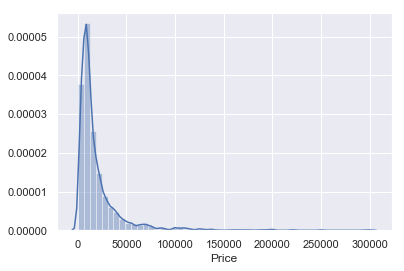

In [133]:
sns.distplot(data_no_mv['Price'])

## Dealing with outliers

In [134]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         3984   3984.00   3984  3984.00  3984.00        3984   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           880       nan   1528      nan      nan        1853   
mean           NaN  17837.12    NaN   165.12     2.74         NaN   
std            NaN  18976.27    NaN   102.77     4.96         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6980.00    NaN    93.00     1.80         NaN   
50%            NaN  11400.00    NaN   160.00     2.20         NaN   
75%            NaN  21000.00    NaN   230.00     3.00         NaN   
max            NaN 129222.00    NaN   980.00    99.99         NaN   

       Registration    Year  
count          3984 3984.00  
unique            2     nan  
top             yes     nan  
freq           3613     nan  
mean            NaN 2006.29  
std             NaN    6.67  
min             NaN 1969.00  
25%             NaN 2002.75  
50%             NaN 2007.00  
75%             NaN 2011.00  
max             NaN 2016.00

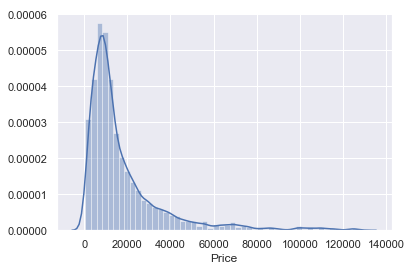

In [135]:
sns.distplot(data_1['Price'])

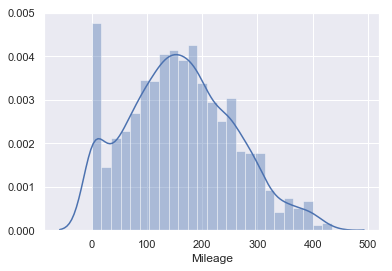

In [136]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
sns.distplot(data_2['Mileage'])

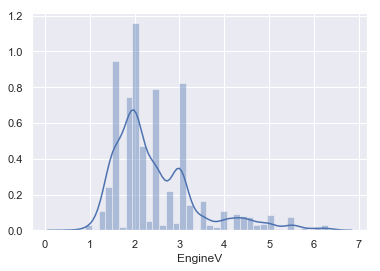

In [137]:
# 6.5 is natural domain of engine volume, max size
data_3 = data_2[data_2['EngineV'] < 6.5]
sns.distplot(data_3['EngineV'])

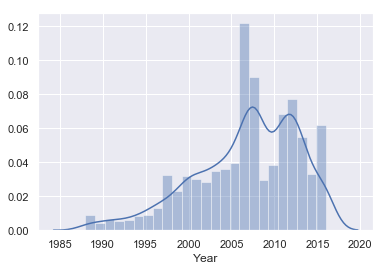

In [138]:
# 6.5 is natural domain of engine volume, max size
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]
sns.distplot(data_4['Year'])

In [176]:
data_cleaned = data_4.reset_index(drop=True)

In [140]:
data_cleaned.describe(include="all")

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         3867   3867.00   3867  3867.00  3867.00        3867   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           848       nan   1467      nan      nan        1807   
mean           NaN  18194.46    NaN   160.54     2.45         NaN   
std            NaN  19085.86    NaN    95.63     0.95         NaN   
min            NaN    800.00    NaN     0.00     0.60         NaN   
25%            NaN   7200.00    NaN    91.00     1.80         NaN   
50%            NaN  11700.00    NaN   157.00     2.20         NaN   
75%            NaN  21700.00    NaN   225.00     3.00         NaN   
max            NaN 129222.00    NaN   435.00     6.30         NaN   

       Registration    Year  
count          3867 3867.00  
unique            2     nan  
top             yes     nan  
freq           3505     nan  
mean            NaN 2006.71  
std             NaN    6.10  
min             NaN 1988.00  
25%             NaN 2003.00  
50%             NaN 2008.00  
75%             NaN 2012.00  
max             NaN 2016.00

In [141]:
## Checking OLS assumptions

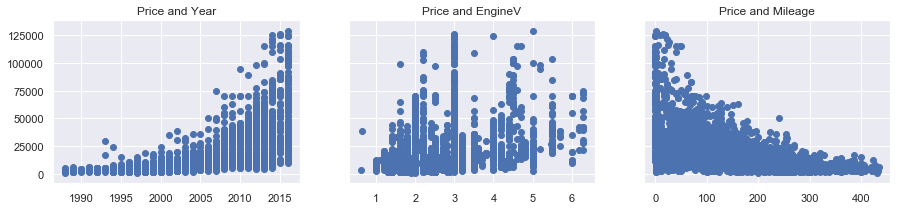

In [142]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

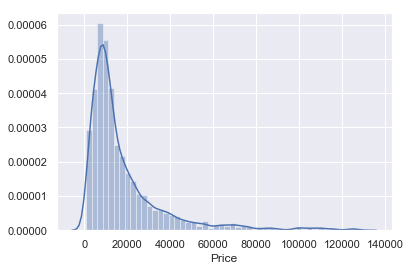

In [143]:
sns.distplot(data_cleaned['Price'])

## Relaxing Assumptions

In [144]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW  4200.00      sedan      277     2.00      Petrol   
1  Mercedes-Benz  7900.00        van      427     2.90      Diesel   
2  Mercedes-Benz 13300.00      sedan      358     5.00         Gas   
3           Audi 23000.00  crossover      240     4.20      Petrol   
4         Toyota 18300.00  crossover      120     2.00      Petrol   

  Registration  Year  log_price  
0          yes  1991       8.34  
1          yes  1999       8.97  
2          yes  2003       9.50  
3          yes  2007      10.04  
4          yes  2011       9.81

In [145]:
### Replot

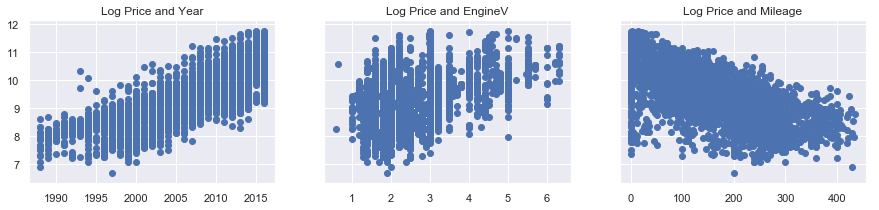

In [146]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [147]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

## Multicollinearity

In [175]:
## check by variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

VIF features
0  3.79  Mileage
1 10.35     Year
2  7.66  EngineV

When VIF is 1, no multicollinearity, when it is closer to infinity then you see more collinearity. VIF above 5 or 6 is not acceptable. Usuaully VIF < 5 is good.

In [149]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

## Create dummy vars

In [150]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [151]:
cols = data_with_dummies.columns.values
cols

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [152]:
## Check vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_with_dummies[['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

VIF             features
0  41.98            log_price
1   4.46              Mileage
2  13.45              EngineV
3   2.60            Brand_BMW
4   3.08  Brand_Mercedes-Benz
5   1.83     Brand_Mitsubishi
6   2.28        Brand_Renault
7   2.41         Brand_Toyota
8   3.31     Brand_Volkswagen
9   1.58           Body_hatch
10  1.60           Body_other
11  3.46           Body_sedan
12  1.81           Body_vagon
13  2.58             Body_van
14  1.71      Engine Type_Gas
15  1.08    Engine Type_Other
16  2.51   Engine Type_Petrol
17 15.17     Registration_yes

In [153]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277     2.00       8.34          1                    0   
1      427     2.90       8.97          0                    1   
2      358     5.00       9.50          0                    1   
3      240     4.20      10.04          0                    0   
4      120     2.00       9.81          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

## Linear Regression Model

In [154]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

In [155]:
## scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [156]:
inputs_scaled = scaler.transform(inputs)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


### Train data

In [157]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [158]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [159]:
y_hat = reg.predict(x_train)

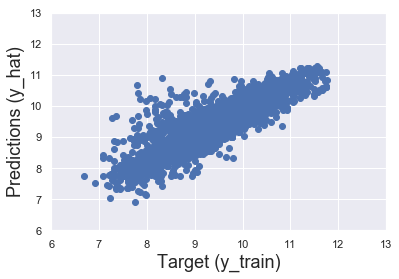

In [160]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Risiduals PDF')

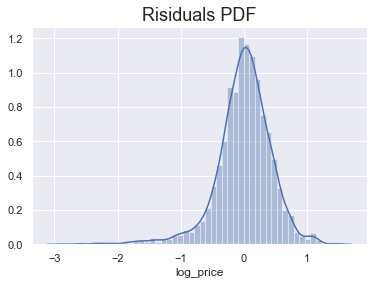

In [161]:
sns.distplot(y_train - y_hat)
plt.title("Risiduals PDF", size=18)

In [162]:
reg.score(x_train, y_train)

0.744996578792662

In [163]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary['Weights'] = reg.coef_
reg_summary

Features  Weights
0               Mileage    -0.45
1               EngineV     0.21
2             Brand_BMW     0.01
3   Brand_Mercedes-Benz     0.01
4      Brand_Mitsubishi    -0.14
5         Brand_Renault    -0.18
6          Brand_Toyota    -0.06
7      Brand_Volkswagen    -0.09
8            Body_hatch    -0.15
9            Body_other    -0.10
10           Body_sedan    -0.20
11           Body_vagon    -0.13
12             Body_van    -0.17
13      Engine Type_Gas    -0.12
14    Engine Type_Other    -0.03
15   Engine Type_Petrol    -0.15
16     Registration_yes     0.32

In [164]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [165]:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

## Testing

In [166]:
y_hat_test = reg.predict(x_test)

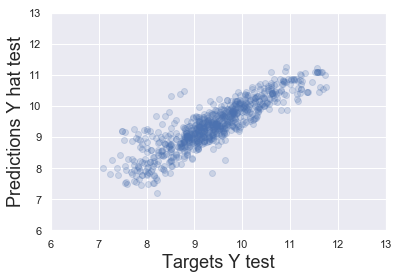

In [167]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets Y test', size=18)
plt.ylabel('Predictions Y hat test', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [168]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

Prediction
0    10685.50
1     3499.26
2     7553.29
3     7463.96
4    11353.49

In [169]:
# this drops original index to fix null values, since pd
# preserves index and it screws up matching
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf.head()

Prediction  Target
0    10685.50 2300.00
1     3499.26 2800.00
2     7553.29 2500.00
3     7463.96 6400.00
4    11353.49 9150.00

In [170]:
df_pf['Risidual'] = df_pf['Target'] - df_pf['Prediction']

In [171]:
df_pf['Difference'] = np.absolute(df_pf['Risidual']/df_pf['Target']*100)
df_pf.head()

Prediction  Target  Risidual  Difference
0    10685.50 2300.00  -8385.50      364.59
1     3499.26 2800.00   -699.26       24.97
2     7553.29 2500.00  -5053.29      202.13
3     7463.96 6400.00  -1063.96       16.62
4    11353.49 9150.00  -2203.49       24.08

In [172]:
df_pf.describe()

Prediction    Target  Risidual  Difference
count      774.00    774.00    774.00      774.00
mean     15946.76  18165.82   2219.06       36.26
std      13133.20  19967.86  10871.22       55.07
min       1320.56   1200.00 -29456.50        0.06
25%       7413.64   6900.00  -2044.19       12.11
50%      11568.17  11600.00    142.52       23.47
75%      20162.41  20500.00   3147.34       39.56
max      77403.06 126000.00  85106.16      512.69

In [173]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference'])

Prediction   Target  Risidual  Difference
698    30480.85 30500.00     19.15        0.06
742    16960.31 16999.00     38.69        0.23
60     12469.21 12500.00     30.79        0.25
110    25614.14 25500.00   -114.14        0.45
367    42703.68 42500.00   -203.68        0.48
369     3084.69  3100.00     15.31        0.49
769    29651.73 29500.00   -151.73        0.51
272     9749.53  9800.00     50.47        0.52
714    23118.07 22999.00   -119.07        0.52
630     8734.58  8800.00     65.42        0.74
380     3473.79  3500.00     26.21        0.75
648    21174.10 21335.00    160.90        0.75
308     8967.74  8900.00    -67.74        0.76
665    17858.02 18000.00    141.98        0.79
379    17654.84 17800.00    145.16        0.82
719    11391.95 11500.00    108.05        0.94
102    28625.56 28900.00    274.44        0.95
94      7724.17  7800.00     75.83        0.97
561     6429.03  6500.00     70.97        1.09
242     7597.39  7500.00    -97.39        1.30
528    18555.09 18800.00    244.91        1.30
61      7396.87  7300.00    -96.87        1.33
19     16178.14 16400.00    221.86        1.35
280    12327.10 12499.00    171.90        1.38
311    51287.19 52055.25    768.06        1.48
723     6009.63  6100.00     90.37        1.48
49      4973.17  4900.00    -73.17        1.49
114    27716.14 27300.00   -416.14        1.52
636    28498.91 28950.00    451.09        1.56
612     2953.17  3000.00     46.83        1.56
..          ...      ...       ...         ...
465     6537.82  2700.00  -3837.82      142.14
81     12891.96  5300.00  -7591.96      143.24
554     8340.94  3350.00  -4990.94      148.98
609     3040.77  1200.00  -1840.77      153.40
677     9631.08  3799.00  -5832.08      153.52
161    13967.55  5500.00  -8467.55      153.96
635     3818.71  1450.00  -2368.71      163.36
660     7809.13  2899.00  -4910.13      169.37
664     4590.49  1700.00  -2890.49      170.03
82      7320.42  2600.00  -4720.42      181.55
282    12261.19  4100.00  -8161.19      199.05
2       7553.29  2500.00  -5053.29      202.13
729     9817.06  3200.00  -6617.06      206.78
492     7161.67  2200.00  -4961.67      225.53
382     7918.89  2400.00  -5518.89      229.95
502     9984.87  3000.00  -6984.87      232.83
750    10381.62  3000.00  -7381.62      246.05
434     8843.22  2500.00  -6343.22      253.73
182    10123.04  2800.00  -7323.04      261.54
396    16165.79  4400.00 -11765.79      267.40
298    17937.36  4800.00 -13137.36      273.69
629     7319.77  1850.00  -5469.77      295.66
619    16095.32  3600.00 -12495.32      347.09
0      10685.50  2300.00  -8385.50      364.59
485     9664.46  1900.00  -7764.46      408.66
657    32481.05  6000.00 -26481.05      441.35
162     9954.42  1800.00  -8154.42      453.02
451    35956.50  6500.00 -29456.50      453.18
532    10019.90  1800.00  -8219.90      456.66
639    30628.28  4999.00 -25629.28      512.69

[774 rows x 4 columns]

## Retrain using model

In [182]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)
# TODO: include model again
# inputs['Model'] = data_cleaned['Model']


In [ ]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)